# RDA by date

Shows how many reports happened by month.

#### Data loading
Merge all the monthly RDA reports.

In [1]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import socket
import os

In [2]:
# Plotting parameters
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# computer:
hostname = socket.gethostname()

if hostname == 'arch':
    directory = '/home/sergio/Documents/TELMEX/Productividad/Datos/2020/rda/'
else:
    directory = '/home/sergio/Documents/Telmex/Productividad/Data/2020/rda/'

file_prefix = 'rdat_metro'

df = pd.DataFrame()

rda_files = []
columns = []
for f in os.listdir(directory):
    if f.startswith(file_prefix):
        df_tmp = pd.read_excel(directory + f, sheet_name='base')
        #print(f, '-', df_tmp.shape)
        columns.append(df_tmp.columns)
        df = df.append(df_tmp)
        
#print(df.shape)

# FILTER BY CM
# df = df[df['CMANTENI'] == 'CMABS']
# print('Data frame shape:', df.shape)

# SPLIT DATA BY COLUMNS' TYPE
date_cols = df.select_dtypes('datetime')
int_cols = df.select_dtypes('number')
obj_cols = df.select_dtypes(object)
#print(date_cols.shape)
#print(int_cols.shape)
#print(obj_cols.shape)

# Reportes por hora

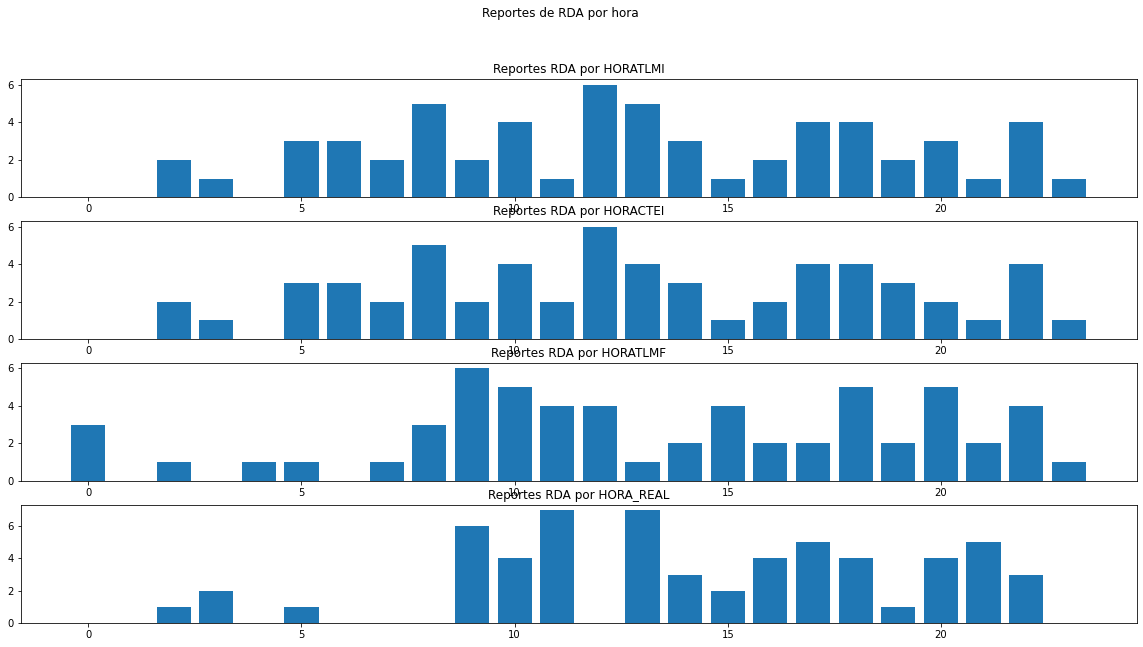

In [7]:
cols = [
    'HORATLMI',
    'HORACTEI',
    'HORATLMF',
    'HORA_REAL',
]

# Build plot frame
fig, axs = plt.subplots(len(cols))
fig.suptitle('Reportes de RDA por hora')

for i, col in enumerate(cols):
    # remove nan values
    hour_data = obj_cols[obj_cols[col].notna()]
    # extract hour as int
    time_df = pd.DataFrame(hour_data[hour_data['CMANTENI'] == 'CMABS'][col].astype(str).str[:2].astype(int))
    
    xy = time_df.value_counts().sort_index()
    xs, ys = [], []
    xs = [x for x in range(24)]

    for h in range(24):
        try:
            ys.append(xy[h])
        except KeyError:
            ys.append(0)
            
    axs[i].set_title("Reportes RDA por " + col )
    axs[i].bar(xs, ys)

# Reportes por día

----
### Dates and reports
The following function build a dictionary of dates and reports sum

In [4]:
def instances_dictionary(instances, dates):
    # Make an dictionary of dates and instances (zeros included)
    partial_instances = dict() # instances present in the data
    for k, v in instances_by_day.iteritems():
        partial_instances[k.date()] = v

    instances = dict() # instances considering all day in a year
    for day in dates:
        instances[day] = 0 if day not in partial_instances.keys() else partial_instances[day]
    
    return instances

In [5]:
# BUILD ALL DATES
start_date = df['FECHA_REAL'].min().date()
end_date = df['FECHA_REAL'].max().date()

# Make date range
delta = end_date - start_date

dates = []
for i in range(delta.days + 1):
    dates.append(start_date + timedelta(days=i))

<BarContainer object of 366 artists>

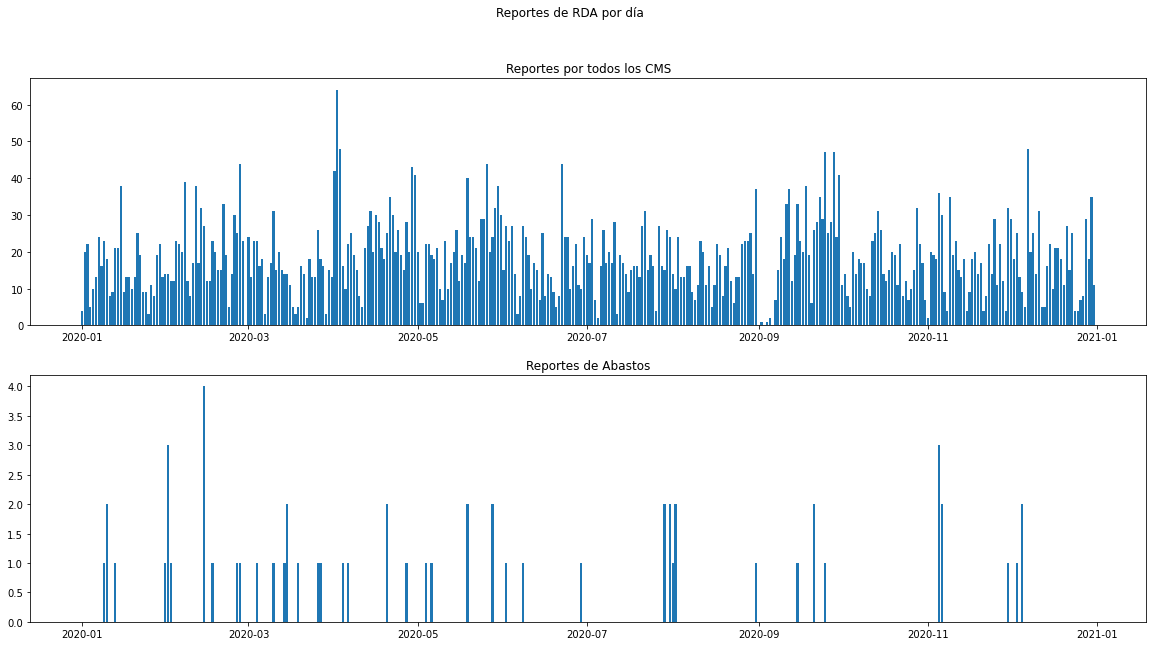

In [6]:
# Build plot frame
fig, axs = plt.subplots(2)
fig.suptitle('Reportes de RDA por día')

# Get number of reports for all CMS
instances_by_day = df['FECHA_REAL'].dt.floor('d').value_counts()
instances = instances_dictionary(instances_by_day, dates)
axs[0].set_title("Reportes por todos los CMS")
axs[0].bar(instances.keys(), instances.values())

# Get number of reports for CMABS
instances_by_day = df[df['CMANTENI'] == 'CMABS']['FECHA_REAL'].dt.floor('d').value_counts()
instances = instances_dictionary(instances_by_day, dates)
axs[1].set_title("Reportes de Abastos")
axs[1].bar(instances.keys(), instances.values())

# Reportes por mes

In [7]:
def plotter(df, axs, i):
    # Get number of reports for all CMS
    instances_by_month = df['FECHA_REAL'].groupby([df.FECHA_REAL.dt.year, df.FECHA_REAL.dt.month]).agg('count')
    instances_by_month = pd.DataFrame(instances_by_month)
    instances_by_month['year_month'] = instances_by_month.index.to_series().apply(lambda x: '{0}-{1:02}'.format(*x))
    axs[i].set_title("Reportes por todos los CMS")
    axs[i].bar(instances_by_month['year_month'], instances_by_month['FECHA_REAL'])

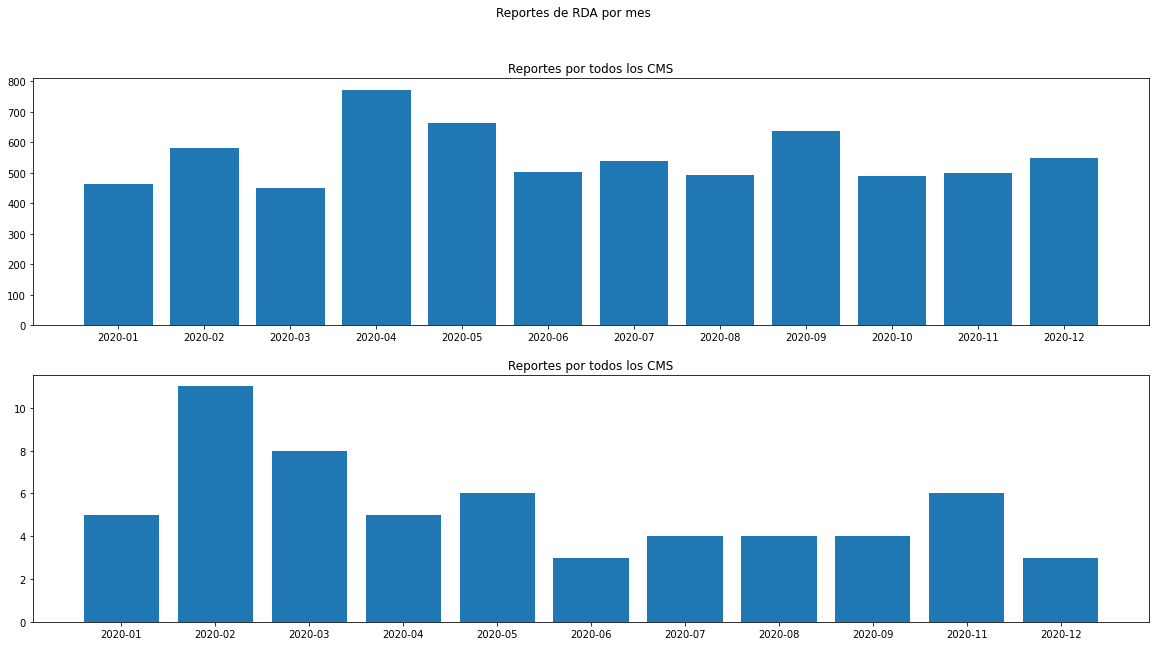

In [8]:
# Build plot frame
fig, axs = plt.subplots(2)
fig.suptitle('Reportes de RDA por mes')

# Plot all CMS by month
plotter(df, axs, 0)

# Plot CM Abastos by month
df_ab = df[df['CMANTENI'] == 'CMABS']
plotter(df_ab, axs, 1)